In [1]:
import pandas as pd
import pickle

df=pd.read_csv('ipl.csv')

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']

In [5]:
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [10]:
#remove first 5 overs from each match
df=df[df['overs']>=5.0]

In [11]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [12]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [13]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [14]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [15]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Kolkata Knight Riders','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [19]:
encoded_df.head()

,date,bat_team_Kolkata Knight Riders,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.5,61,1,58,1,222


In [20]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [21]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [22]:
# Removing the 'date' column because it is not required in X_train for prediction
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# ***LINEAR RIGRESSION***

In [23]:
# --- Model Building ---
# Linear Regression Model
# using simple linear regression for making the prediction
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [25]:
open('first-innings-score-lr-model.pkl', mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)

<_io.TextIOWrapper name='first-innings-score-lr-model.pkl' mode='r' encoding='UTF-8'>

In [26]:
with open('first-innings-score-lr-model.pkl', 'rb') as f:
    data = pickle.load(f)

In [27]:
#print y-intercept
print(regressor.intercept_)

print(regressor.coef_)

165.73282069509978
[-2.96316175  1.07652799 -2.26502957  0.57640187  2.85740487 -3.70926822
  3.85007173  0.57705308  0.13499716  0.85400686  1.61346247 -3.36235712
  0.19380598  0.29179034  0.68934312 -0.41504881 -6.37127207  0.96320203
 -4.88540989 -0.01670462 -1.1550842 ]


In [30]:
y_pred=regressor.predict(X_test)


In [31]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 12.118617546193207
MSE: 251.00792310417194
RMSE: 15.843229566732028


## ***RIDGE REGRESSION***

In [32]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#we can also use RandomizedSearchCV as it is fast in some cases

In [37]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}#used for hyperparameter technique
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=5.581e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.41793e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.45327e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.39584e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditio

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487924


In [39]:
prediction=ridge_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


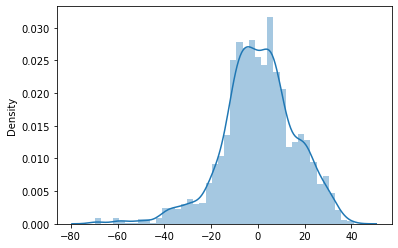

In [40]:
import seaborn as sns
sns.distplot(y_test-prediction)
#we are getting a gaussian distribution

In [41]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005022
MSE: 251.0317296411272
RMSE: 15.843980864704653


In [60]:
import pickle
import numpy as np

filename = 'first-innings-score-lr-model.pkl'
regressor = pickle.load(open(filename, 'rb'))

def predict():
    temp_array = list()
    batting_team= input('Enter batting team: ')

    if batting_team == 'CSK':
            temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'DC':
            temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'KXIP':
            temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'KKR':
            temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'MI':
            temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'RR':
            temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'RCB':
            temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'SRH':
            temp_array = temp_array + [0,0,0,0,0,0,0,1]
        
    bowling_team=input('Enter bowling team: ')

    if bowling_team == 'CSK':
            temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'DC':
            temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'KXIP':
            temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'KKR':
            temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'MI':
            temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'RR':
            temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'RCB':
            temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'SRH':
            temp_array = temp_array + [0,0,0,0,0,0,0,1]

    overs = input('Enter overs (>5): ')
    runs = input('Enter Runs: ')
    wickets = input('Wickets fallen: ')
    runs_in_prev_5 = input('Runs in last 5 overs: ')
    wickets_in_prev_5 = input('Wickets in last 5 overs: ')

    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]
        
    data = np.array([temp_array])
    my_prediction = int(regressor.predict(data)[0])
    lower_limit =int(my_prediction-(my_prediction)*0.05) 
    upper_limit = int(my_prediction+(my_prediction)*0.06)
    print('-------------------------------------------------')
    print('Predicted score at this stage:', my_prediction)
    print('Predicted score in worst case: ', lower_limit)
    print('Predicted score in best case: ', upper_limit)
    print('-------------------------------------------------')
if __name__ == '__main__':
	predict()

Enter batting team: KKR
Enter bowling team: CSK
Enter overs (>5): 17
Enter Runs: 172
Wickets fallen: 5
Runs in last 5 overs: 40
Wickets in last 5 overs: 2
-------------------------------------------------
Predicted score at this stage: 196
Predicted score in worst case:  186
Predicted score in best case:  207
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
